<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.075220  76.683356  73.515125  ...  207.281702  207.275606  0.006095
      1.0    93.204756  21.521860  64.548635  ...  189.266409  189.268799 -0.002390
      2.0    98.340669  96.486522  79.802674  ...  284.630598  284.624672  0.005926
      3.0    93.710314  44.148697  40.862947  ...  188.720438  188.717846  0.002591
      4.0    44.474499  42.846568  76.698919  ...  174.013932  174.020722 -0.006790
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.275661  61.512679  41.524603  ...  170.319156  170.312531  0.006625
      56.0   68.951454  64.417959  81.226833  ...  224.595053  224.594553  0.000501
      57.0   71.593868  48.090445  99.660340  ...  229.336213  229.342351 -0.006138
      58.0   43.843667  70.813039  92.959903  ...  217.608054  217.616334 -0.008280
      59.0   62.139122  84.634288  53.424424  ...  210.193788  210.197185 -0.003396

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.075220  76.683356  73.515125  ...  207.281702  207.275606  0.006095
      1.0    93.204756  21.521860  64.548635  ...  189.266409  189.268799 -0.002390
      2.0    98.340669  96.486522  79.802674  ...  284.630598  284.624672  0.005926
      3.0    93.710314  44.148697  40.862947  ...  188.720438  188.717846  0.002591
      4.0    44.474499  42.846568  76.698919  ...  174.013932  174.020722 -0.006790
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.275661  61.512679  41.524603  ...  170.319156  170.312531  0.006625
      56.0   68.951454  64.417959  81.226833  ...  224.595053  224.594553  0.000501
      57.0   71.593868  48.090445  99.660340  ...  229.336213  229.342351 -0.006138
      58.0   43.843667  70.813039  92.959903  ...  217.608054  217.616334 -0.008280
      59.0   62.139122  84.634288  53.424424  ...  210.193788  210.197185 -0.003396

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.075220  76.683356  73.515125  ...  207.281702  207.275606  0.006095
      1.0    93.204756  21.521860  64.548635  ...  189.266409  189.268799 -0.002390
      2.0    98.340669  96.486522  79.802674  ...  284.630598  284.624672  0.005926
      3.0    93.710314  44.148697  40.862947  ...  188.720438  188.717846  0.002591
      4.0    44.474499  42.846568  76.698919  ...  174.013932  174.020722 -0.006790
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.275661  61.512679  41.524603  ...  170.319156  170.312531  0.006625
      56.0   68.951454  64.417959  81.226833  ...  224.595053  224.594553  0.000501
      57.0   71.593868  48.090445  99.660340  ...  229.336213  229.342351 -0.006138
      58.0   43.843667  70.813039  92.959903  ...  217.608054  217.616334 -0.008280
      59.0   62.139122  84.634288  53.424424  ...  210.193788  210.197185 -0.003396

[60000 rows x 7 columns]

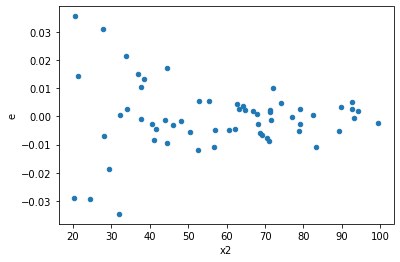

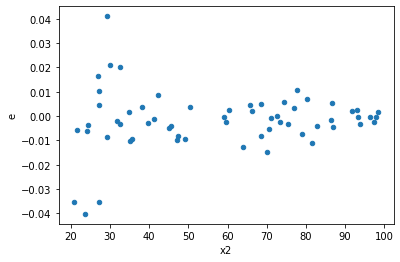

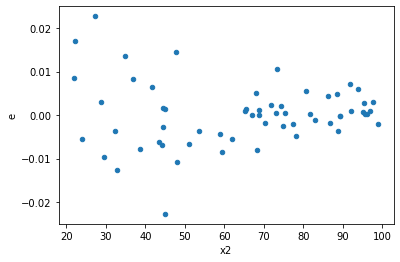

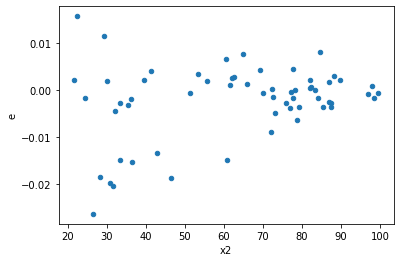

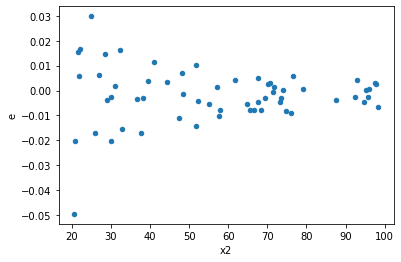

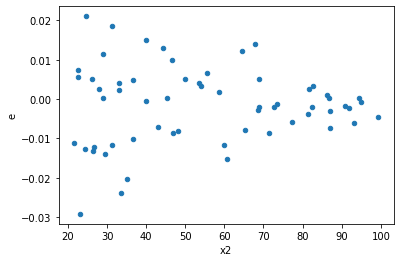

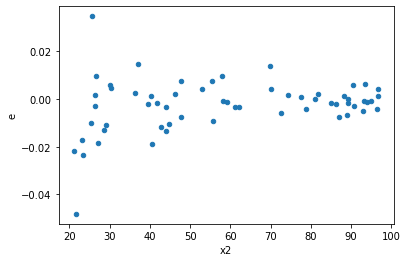

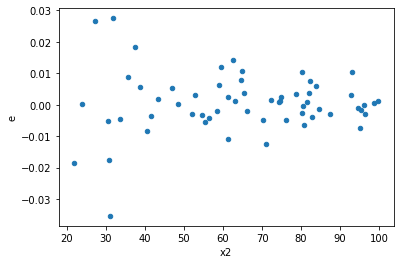

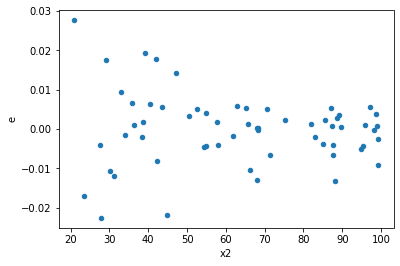

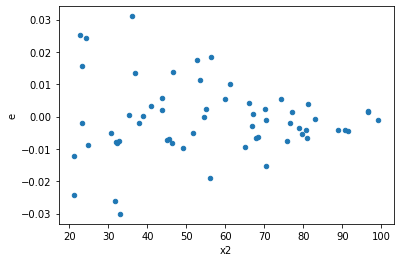

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.003952534468600297,0.0005530275590023675,0.00018821592707620464,2.6334645666779403e-05,0.1399172008228457,3.18849749940787e-05,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,0.004557137129509667,0.00019454780646494522,0.0002170065299766508,9.264181260235487e-06,0.042690794886367164,6.732596036761541e-10,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.0032681261262227372,0.0003507284225078691,0.00015562505362965416,1.6701353452755672e-05,0.10731789685033882,3.416072047843203e-06,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.012565088326122992,0.0006639541858692007,0.0005983375393391901,3.161686599377146e-05,0.05284118731492168,5.253805541179262e-09,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,0.005016765326192913,0.0005015490445172115,0.0002388935869615673,2.388328783415293e-05,0.09997458758905581,1.842128470607405e-06,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.008394420259576138,0.0004939865379803049,0.0003997342980750542,2.3523168475252614e-05,0.0588470105981146,1.4594227426561816e-08,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.0064516817811755426,0.0007552796676301455,0.0003072229419607401,3.5965698458578354e-05,0.11706709866470322,7.204589950230401e-06,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,0.00465003822333672,0.0010316401615436737,0.00022143039158746287,4.912572197827018e-05,0.22185627558205348,0.0010842026897081162,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,0.0034967039594133837,0.00028445872039813434,0.00016650971235301828,1.3545653352292112e-05,0.08135053001337177,2.928019665470622e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    990
Reject005=1 : Homoscedasticity       10
Name: Result_test, dtype: int64